## Appendix figure
### QD simulation including dephasing

In [1]:
# Import Libraries
import Phonon_Number as pn
import parameters as params

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import clear_output
from scipy.io import savemat, loadmat

In [ ]:
'''
Define and initialize parameters
'''

# Import parameters
omega_m, g, T1, gamma, temperature, nth = params.QD_params()

N = 50                                           # truncation for the phonon number basis in qutip
dephasing_array = [0, 0.01*g, 0.1*g, 0.5*g]      # in GHz

data_points = 50                                 # number of data points in arrays
pump = g*np.logspace(-1, 1, data_points)         # in GHz
T2 = g*np.logspace(-1, 1, data_points)           # in GHz

# Initializing arrays
simulation_1 = np.zeros((len(T2), len(pump)))
simulation_2 = np.zeros((len(T2), len(pump)))
simulation_3 = np.zeros((len(T2), len(pump)))
simulation_4 = np.zeros((len(T2), len(pump)))

In [2]:
'''
Iterating over pump and T2 to calculate simulation values
'''

dephasing = dephasing_array[0]
for i in range(len(pump)):
    for j in range(len(T2)):
        
        # Using simulations
        simulation_1[i,j] = pn.QD_simulation(g, pump[i], T2[j], T1, gamma, dephasing, nth, N)
        
        # Progress monitor
        if(np.mod(i,10) == 0 and np.mod(j,10) == 0):
            print((i/100,j/100))

dephasing = dephasing_array[1]
for i in range(len(pump)):
    for j in range(len(T2)):
        
        # Using simulations
        simulation_2[i,j] = coherent_simulation(g, pump[i], T2[j], T1, gamma, dephasing, nth, N)
        
        # Progress monitor
        if(np.mod(i,10) == 0 and np.mod(j,10) == 0):
            print((i/100,j/100))

dephasing = dephasing_array[2]
for i in range(len(pump)):
    for j in range(len(T2)):
        
        # Using simulations
        simulation_3[i,j] = coherent_simulation(g, pump[i], T2[j], T1, gamma, dephasing, nth, N)
        
        # Progress monitor
        if(np.mod(i,10) == 0 and np.mod(j,10) == 0):
            print((i/100,j/100))

dephasing = dephasing_array[3]
for i in range(len(pump)):
    for j in range(len(T2)):
        
        # Using simulations
        simulation_4[i,j] = coherent_simulation(g, pump[i], T2[j], T1, gamma, dephasing, nth, N)
        
        # Progress monitor
        if(np.mod(i,10) == 0 and np.mod(j,10) == 0):
            print((i/100,j/100))

clear_output()
print('Calculations done!')

Calculations done!


In [ ]:
'''
Save data into .mat file
'''

QD_dephasing_appendix = {'data_points' : data_points,
                        'g' : g,
                        'pump' : pump,
                        'T2' : T2,
                        'T1' : T1,
                        'gamma' : gamma,
                        'dephasing_array': dephasing_array,
                        'N' : N,
                        'nth' : nth,
                        'simulation_1': simulation_1,
                        'simulation_2': simulation_2,
                        'simulation_3': simulation_3,
                        'simulation_4': simulation_4,
}

savemat("./data files/QD_dephasing_appendix.mat", QD_dephasing_appendix) # saving data

In [5]:
'''
Import data for plotting
'''

QD_dephasing_appendix = loadmat("./data files/QD_dephasing_appendix.mat")
g = int(QD_dephasing_appendix['g'])
T2 = QD_dephasing_appendix['T2'][0]
pump = QD_dephasing_appendix['pump'][0]

simulation_1 = QD_dephasing_appendix['simulation_1']
simulation_2 = QD_dephasing_appendix['simulation_2']
simulation_3 = QD_dephasing_appendix['simulation_3']
simulation_4 = QD_dephasing_appendix['simulation_4']

dephasing_array = QD_dephasing_appendix['dephasing_array'][0]

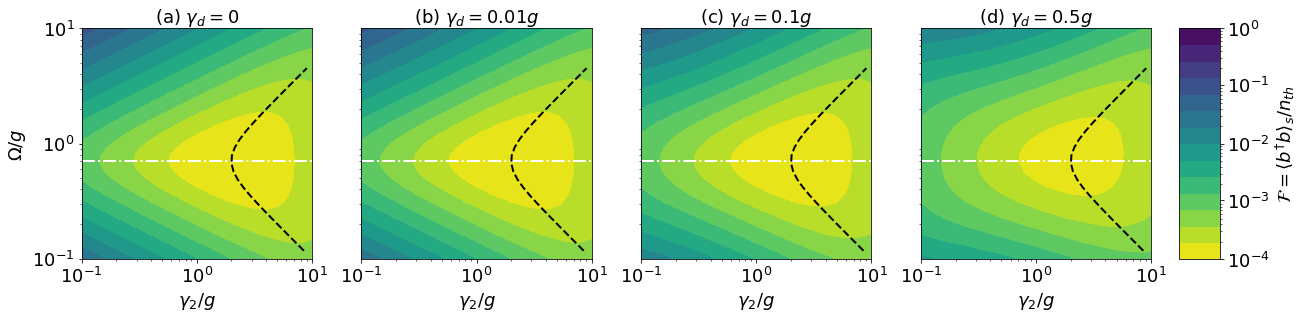

In [6]:
'''
Plotting
'''

fig = plt.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=4, nrows=1) # subplot grid
[X,Y] = np.meshgrid(T2/g,pump/g) # define X,Y for contour plot
levels = np.logspace(-4,0,15) # finetune gradation in contour plot
locator = ticker.LogLocator(base=10)
size = simulation_1.shape[0] - 5

fig.add_subplot(spec[0, 0])
plt.contourf(X,Y, simulation_1, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r') # contour plot
plt.plot(T2/g, pump/(pump*2**(1/2)), color = 'white', linestyle = '-.', linewidth = 2)
plt.plot((4*pump[1:size]**2/g**2 + g**2/(pump[1:size]**2))**0.5, pump[1:size]/g, color = 'black', linestyle = '--', linewidth = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\gamma_2/g$', fontsize = 18)
plt.ylabel('$\Omega/g$', fontsize = 18)
plt.xticks(fontsize = 18)
plt.title('(a) $\gamma_d = 0$', fontsize = 18)
plt.yticks(fontsize = 18)
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')

fig.add_subplot(spec[0, 1])
plt.contourf(X,Y, simulation_2, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r') # contour plot
plt.plot(T2/g, pump/(pump*2**(1/2)), color = 'white', linestyle = '-.', linewidth = 2)
plt.plot((4*pump[1:size]**2/g**2 + g**2/(pump[1:size]**2))**0.5, pump[1:size]/g, color = 'black', linestyle = '--', linewidth = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\gamma_2/g$', fontsize = 18)
plt.xticks(fontsize = 18)
plt.title('(b) $\gamma_d = {}g$'.format(dephasing_array[1]/g), fontsize = 18)
plt.yticks([])
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')

fig.add_subplot(spec[0, 2])
plt.contourf(X,Y, simulation_3, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r') # contour plot
plt.plot(T2/g, pump/(pump*2**(1/2)), color = 'white', linestyle = '-.', linewidth = 2)
plt.plot((4*pump[1:size]**2/g**2 + g**2/(pump[1:size]**2))**0.5, pump[1:size]/g, color = 'black', linestyle = '--', linewidth = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\gamma_2/g$', fontsize = 18)
plt.xticks(fontsize = 18)
plt.title('(c) $\gamma_d = {}g$'.format(dephasing_array[2]/g), fontsize = 18)
plt.yticks([])
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')

fig.add_subplot(spec[0, 3])
plt.contourf(X,Y, simulation_4, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r') # contour plot
plt.plot(T2/g, pump/(pump*2**(1/2)), color = 'white', linestyle = '-.', linewidth = 2)
plt.plot((4*pump[1:size]**2/g**2 + g**2/(pump[1:size]**2))**0.5, pump[1:size]/g, color = 'black', linestyle = '--', linewidth = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\gamma_2/g$', fontsize = 18)
plt.xticks(fontsize = 18)
plt.title('(d) $\gamma_d = {}g$'.format(dephasing_array[3]/g), fontsize = 18)
plt.yticks([])
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')

cbar = plt.colorbar(ticks=locator, aspect = 20, shrink = 0.65)
cbar.set_label(r'$\mathcal{F} = \langle b^{\dagger}b \rangle_s/n_{th}$', fontsize = 18)
cbar.ax.tick_params(labelsize=18) 

fig = plt.gcf()
fig.set_size_inches((18, 5), forward=False)

# fig.savefig('./figures/QD_dephasing_appendix.pdf')